In [ ]:
"""
git remote rm origin

# Initialise the repo
git init

# Login into Github with your account (https://github.com/) and create a public repo with the name `adv_dsi_2022-at2.git`

# Link repo with Github
git remote add origin git@github.com:hitoshi0531/dsi-at2.git
git remote add origin git@github.com:hitoshi0531/dsi-at2-api.git

# Add you changes to git staging area and commit them
git add .
git commit -m "init"

# Push your master branch to origin
git push git@github.com:hitoshi0531/dsi-at2.git
git push git@github.com:hitoshi0531/dsi-at2-api.git

# Preventing push to master branch
git config branch.master.pushRemote no_push

# Create a new git branch called pytorch_mnist
git checkout -b pytorch_multi_class
"""

## 1. Data Exploration

In [1]:
#import pnadas and numpy
import pandas as pd
import numpy as np

In [2]:
#Load the dataset into dataframe
df = pd.read_csv('../data/raw/beer_reviews.csv')

In [3]:
#Get the header of the dataframe
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
#Get the shape of the dataframe
df.shape

(1586614, 13)

In [5]:
#Get the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


**i.e. There are 4 object columns, so they have to be removed or converted into numerical columns.**

In [6]:
#Get the descriptive stats of the dataframe
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


array([[<AxesSubplot: title={'center': 'brewery_id'}>,
        <AxesSubplot: title={'center': 'review_time'}>,
        <AxesSubplot: title={'center': 'review_overall'}>],
       [<AxesSubplot: title={'center': 'review_aroma'}>,
        <AxesSubplot: title={'center': 'review_appearance'}>,
        <AxesSubplot: title={'center': 'review_palate'}>],
       [<AxesSubplot: title={'center': 'review_taste'}>,
        <AxesSubplot: title={'center': 'beer_abv'}>,
        <AxesSubplot: title={'center': 'beer_beerid'}>]], dtype=object)

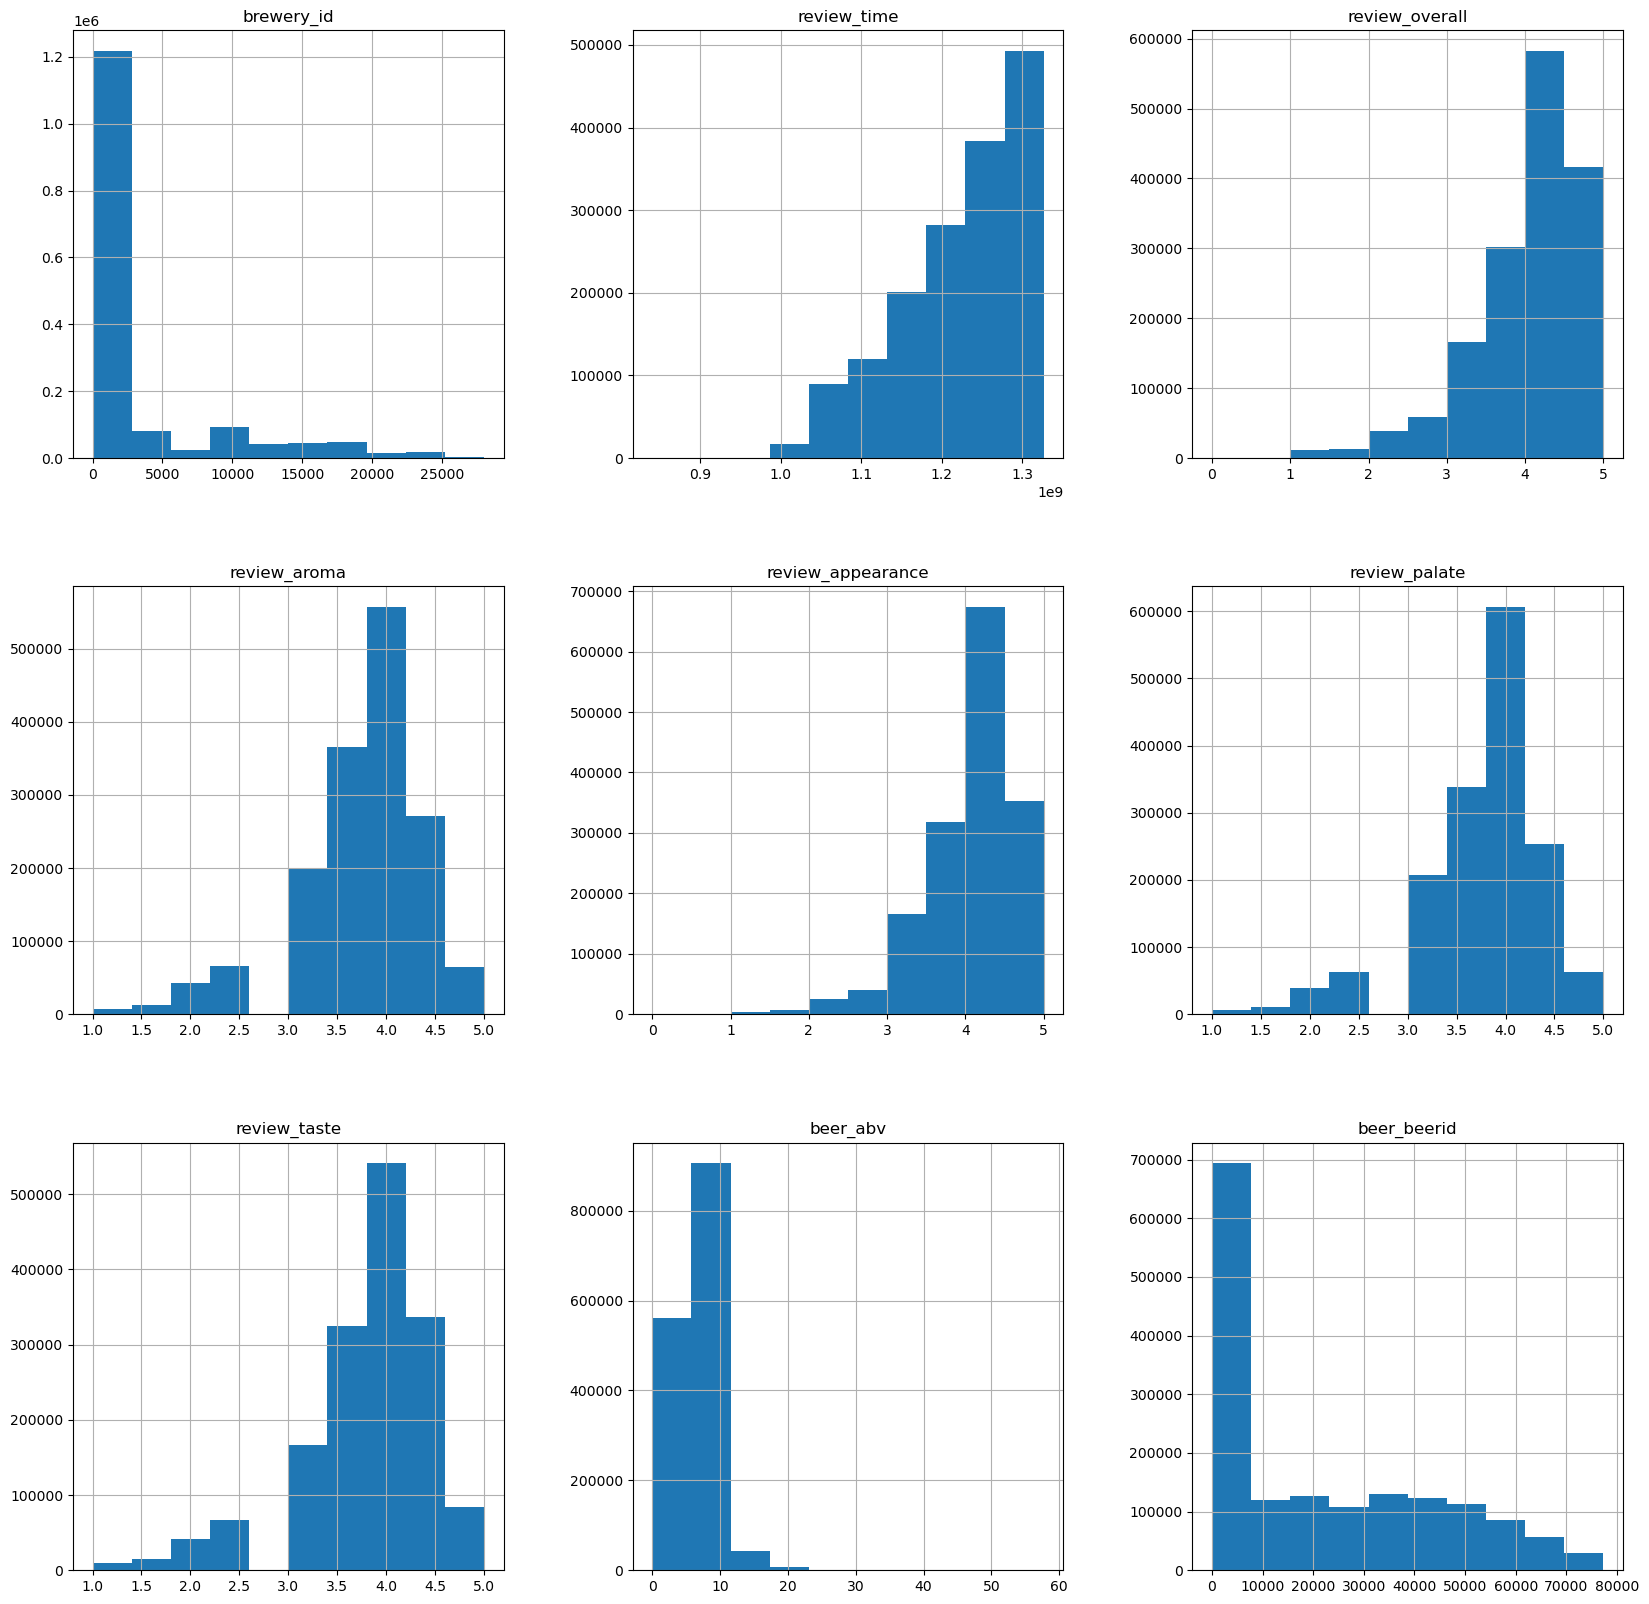

In [7]:
#Check the distribution of the value of each quantitative column
df.hist(figsize = (20,20))

In [8]:
#pd.plotting.scatter_matrix(df, figsize = (20,20))

In [9]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_1183/2839354321.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


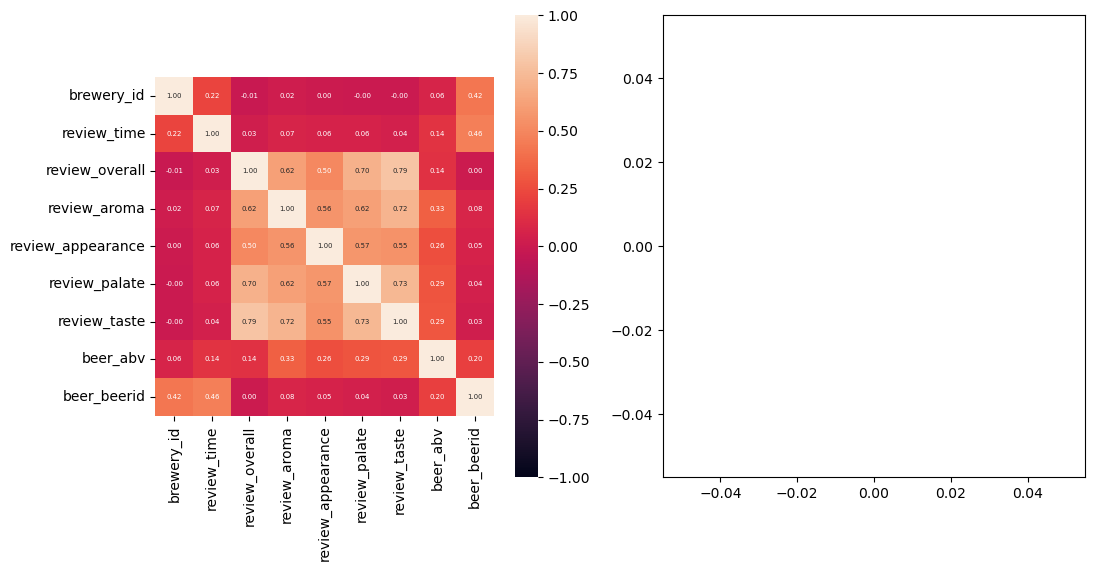

In [10]:
#Check the correlations between the features in the dataset
import matplotlib.pyplot as plt
import seaborn as sns


cols = df.columns
rows = cols
corr = df.corr()

# Click event definition start
#Matplotlibで用意されているOnclick関数を定義して呼ぶ
def onclick(event):
#xとyにマウスカーソルのX軸Y軸の値を入力する
    x = event.xdata
    y = event.ydata
    axes = event.inaxes
#軸の外(操作範囲外)にカーソルがある場合にxとyにNoneが入るのでこれを除外
    if x == None or y == None:
        return
#ax[0]のヒートマップをクリックしたときだけ操作しそれ以外は無視
    if axes != ax[0]:
        return

#colとrowの変数にカーソル位置に対応する列のcols, 対応する行のrowsを入力
#x, yの小数点切り捨ての値がインデックス番号と一致する
    col = cols[int(x)]
    row = rows[int(y)]

#x軸の長さを列数の最大 - 最小と定義する ※散布図の範囲指定用
#y軸の長さを行数の最大 - 最小と定義する ※散布図の範囲指定用
    xwid = df[col].max() - df[col].min()
    ywid = df[row].max() - df[row].min()

    # update the plot on the right side
#ax[1]の散布図(右、二つ目)を更新する
    ax[1].set_title('Correlation coefficient ' + col + ' - ' + row + ': ' \
                    + str(round(corr.loc[row, col], 3)))
    ax[1].set_xlabel(col)
    ax[1].set_ylabel(row)
    ln.set_data(df[col], df[row])
#散布図の枠の範囲はmin, max値より少し大きめにしておく
    ax[1].set_xlim(df[col].min() - xwid * 0.1, df[col].max() + xwid * 0.1)
    ax[1].set_ylim(df[row].min() - ywid * 0.1, df[row].max() + ywid * 0.1)
    plt.draw()
    # Click event definition end
    
#Figure: 描画領域全体
#Axes: 一つ一つのプロットを描く領域
#FigureとAxesを同時に生成(引数: 1行2列のAxes=サブプロットを生成)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
#ヒートマップを生成
sns.heatmap(corr, ax=ax[0], vmin=-1, vmax=1, annot=True, fmt="3.2f", annot_kws={"size": 5})

ln, = ax[1].plot([np.nan], [np.nan], 'o') #Plot event
#1つめのAxをアスペクト(縦横比)を正方形にする
ax[0].set_aspect('equal')
#Click event
#マウスクリックしたときのイベント定義(イベント名, イベント時の動作=onclickする)
fig.canvas.mpl_connect('button_press_event', onclick)
#Display the heatmap
plt.draw()




## 2. Data Preparation

In [11]:
#Create a copy of df and save it into a variable called df_tmp1
df_tmp1 = df.copy()

In [12]:
#Load the autoreload extension
%load_ext autoreload
%autoreload 2

In [13]:
#Remove the columns "brewery_name" and "beer_name" as they correspond to the ones "brewery_id" and "beer_beerid" and the numerical ones are better to manipulate than the object ones
#df_tmp1.drop(columns = ['brewery_name', 'beer_name'], axis=1, inplace=True)

In [14]:
#Remove an unnecessary column "review_profilename"
#df_tmp1.drop(columns = ['review_profilename'], axis=1, inplace=True)

In [15]:
#Identify missing values
print("Count of missing values", df_tmp1.isnull().sum())

Count of missing values brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


In [16]:
#Remove the missing values
df_tmp1.dropna(inplace=True)

In [17]:
#Reset the indexes of the dataframe
df_tmp1.reset_index(drop=True, inplace=True)

In [18]:
import sys

In [19]:
#Convert the datatype of review_time into datetime
df_tmp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518478 entries, 0 to 1518477
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 150.6+ MB


In [20]:
df_tmp2 = df_tmp1.loc[:,['brewery_name','review_aroma', 'review_appearance', 'beer_style','review_palate', 'review_taste','beer_abv']]

In [21]:
#Check the latest dataframe information
df_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518478 entries, 0 to 1518477
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   brewery_name       1518478 non-null  object 
 1   review_aroma       1518478 non-null  float64
 2   review_appearance  1518478 non-null  float64
 3   beer_style         1518478 non-null  object 
 4   review_palate      1518478 non-null  float64
 5   review_taste       1518478 non-null  float64
 6   beer_abv           1518478 non-null  float64
dtypes: float64(5), object(2)
memory usage: 81.1+ MB


In [22]:
#Check the latest dataframe description
df_tmp2.describe()

,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06
mean,3.746218e+00,3.850383e+00,3.753735e+00,3.804082e+00,7.042488e+00
std,6.953440e-01,6.143106e-01,6.793350e-01,7.286079e-01,2.322568e+00
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01


In [23]:
df_tmp2.head()

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,Vecchio Birraio,2.0,2.5,Hefeweizen,1.5,1.5,5.0
1,Vecchio Birraio,2.5,3.0,English Strong Ale,3.0,3.0,6.2
2,Vecchio Birraio,2.5,3.0,Foreign / Export Stout,3.0,3.0,6.5
3,Vecchio Birraio,3.0,3.5,German Pilsener,2.5,3.0,5.0
4,Caldera Brewing Company,4.5,4.0,American Double / Imperial IPA,4.0,4.5,7.7


**Hereafter, apply StandearScaler and OrdinalEncoding to features**

In [24]:
#Import StandearScaler and OrdinalEncoder from sklearn.processing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

**Apply OrdinalEncoding to categorical columns below**

In [67]:
#Create lists of categorical variable values
beer_style_list = list(pd.DataFrame(df_tmp2['beer_style'].value_counts()).reset_index().iloc[:,0])
brewery_name_list = list(pd.DataFrame(df_tmp2['brewery_name'].value_counts()).reset_index().iloc[:,0])

#Save them into CSV so as to use in the API
pd.DataFrame(beer_style_list).to_csv('../api/app/data/beer_style.csv', index=False)
pd.DataFrame(brewery_name_list).to_csv('../api/app/data/brewery_name.csv', index=False)

brewery_name_list[:10]

['Boston Beer Company (Samuel Adams)',
 'Dogfish Head Brewery',
 'Stone Brewing Co.',
 'Sierra Nevada Brewing Co.',
 "Bell's Brewery, Inc.",
 'Rogue Ales',
 'Founders Brewing Company',
 'Victory Brewing Company',
 'Lagunitas Brewing Company',
 'Avery Brewing Company']

In [28]:
#create a dictionary called cats_dict that contains the categorical variables as keys and their respective values
cats_dict = {
    'beer_style': [df_tmp2['beer_style'].unique()],
    'brewery_name': [df_tmp2['brewery_name'].unique()]
}

In [29]:
#Convert the categrical valiable into numerical one
df_tmp3 = df_tmp2.copy()
for col, cat_cols in cats_dict.items():
    col_encoder = OrdinalEncoder(categories=cat_cols, dtype=int)
    df_tmp3[col] = col_encoder.fit_transform(df_tmp3[[col]])

In [30]:
df_tmp3.describe()

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
count,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06
mean,2.467430e+03,3.746218e+00,3.850383e+00,3.345570e+01,3.753735e+00,3.804082e+00,7.042488e+00
std,1.497901e+03,6.953440e-01,6.143106e-01,2.534587e+01,6.793350e-01,7.286079e-01,2.322568e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02
25%,1.121000e+03,3.500000e+00,3.500000e+00,1.300000e+01,3.500000e+00,3.500000e+00,5.200000e+00
50%,2.399000e+03,4.000000e+00,4.000000e+00,2.700000e+01,4.000000e+00,4.000000e+00,6.500000e+00
75%,3.725000e+03,4.000000e+00,4.000000e+00,5.300000e+01,4.000000e+00,4.500000e+00,8.500000e+00
max,5.154000e+03,5.000000e+00,5.000000e+00,1.030000e+02,5.000000e+00,5.000000e+00,5.770000e+01


In [31]:
df_tmp3.head()

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,0,2.0,2.5,0,1.5,1.5,5.0
1,0,2.5,3.0,1,3.0,3.0,6.2
2,0,2.5,3.0,2,3.0,3.0,6.5
3,0,3.0,3.5,3,2.5,3.0,5.0
4,1,4.5,4.0,4,4.0,4.5,7.7


In [32]:
print(df_tmp3['beer_style'].unique)

<bound method Series.unique of 0           0
1           1
2           2
3           3
4           4
           ..
1518473    40
1518474    40
1518475    40
1518476    40
1518477    40
Name: beer_style, Length: 1518478, dtype: int64>


**Apply StandardScaler to numerical columns below**

In [33]:
#Create a list called num_cols that contains all the numerical columns in the dataframe
num_cols = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']

In [34]:
#Instantiate a StandardScaler into a variable called sc
sc = StandardScaler()

In [35]:
#Fit and transform the numeric feature of the dataframe, and replace the data into it
df_tmp4 = df_tmp3.copy()
df_tmp4[num_cols] = sc.fit_transform(df_tmp4[num_cols])

**Check the processed dataset**

In [36]:
df_tmp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518478 entries, 0 to 1518477
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   brewery_name       1518478 non-null  int64  
 1   review_aroma       1518478 non-null  float64
 2   review_appearance  1518478 non-null  float64
 3   beer_style         1518478 non-null  int64  
 4   review_palate      1518478 non-null  float64
 5   review_taste       1518478 non-null  float64
 6   beer_abv           1518478 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 81.1 MB


In [37]:
df_tmp4.head()

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,0,-2.511302,-2.198210,0,-3.317561,-3.162309,-0.879410
1,0,-1.792233,-1.384289,1,-1.109519,-1.103587,-0.362740
2,0,-1.792233,-1.384289,2,-1.109519,-1.103587,-0.233573
3,0,-1.073164,-0.570368,3,-1.845533,-1.103587,-0.879410
4,1,1.084042,0.243553,4,0.362510,0.955134,0.283097


**Save the processed dataset**

In [38]:
#Copy the dataframe into a variable called df_cleaned
df_cleaned = df_tmp4.copy()

#Save the lates dataframe into data/interim folder
df_cleaned.to_csv('../data/interim/beer_reviews.csv', index=False)

**Then, split the dataframe into training and testing sets**

In [39]:
#Import split_sets_random and save_sets functions
sys.path.append('/home/jovyan/work/src')
from data.sets import split_sets_random, save_sets

In [40]:
#Split the dataset into training, testing, and validating sets
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(df_cleaned, target_col='beer_style', test_ratio=0.2)

In [41]:
#Save the datasets
save_sets(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, path='../data/processed/')

In [42]:
pip install torch torchvision torchtext --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [43]:
sys.path.append('/home/jovyan/work/src')
from models.pytorch import PytorchDataset
train_dataset = PytorchDataset(X=X_train, y=y_train)
val_dataset = PytorchDataset(X=X_val, y=y_val)
test_dataset = PytorchDataset(X=X_test, y=y_test)

## 3. Get Baseline Model

In [44]:
#Import NullModel from src.models.null
sys.path.append('/home/jovyan/work/src')
from models.null import NullModel

In [45]:
#Instantiate a NullModel and call .fit_predict() on the training target to extract your predictions into a variable called y_base
baseline_model = NullModel(target_type='classification')
y_base = baseline_model.fit_predict(y_train)

/home/jovyan/work/src/models/null.py:44: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  self.pred_value = mode(y)[0][0]


In [46]:
#Import print_class_perf from src.models.performance
sys.path.append('/home/jovyan/work/src')
from models.performance import print_class_perf

In [47]:
#Print the classification metrics for this baseline model
print_class_perf(y_base, y_train, set_name='Training', average='weighted')

Accuracy Training: 0.07444192974099043
F1 Training: 0.010315310209270104


## 4. Define Architecture

In [48]:
print(X_train.shape)

(911086, 6)


In [49]:
print(df_cleaned.beer_style.nunique())

104


In [50]:
#Instantiate PytorchMultiClass with the correct number of input feature and save it into a variable called model
sys.path.append('/home/jovyan/work/src')
from models.pytorch import PytorchMultiClass
model = PytorchMultiClass(X_train.shape[1])

In [51]:
print(model)

PytorchMultiClass(
  (layer_1): Linear(in_features=6, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=128, bias=True)
  (layer_out): Linear(in_features=128, out_features=104, bias=True)
)


In [52]:
#Import det_device from pytorch and use the function
sys.path.append('/home/jovyan/work/src')
from models.pytorch import get_device
device = get_device()
model.to(device)

PytorchMultiClass(
  (layer_1): Linear(in_features=6, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=128, bias=True)
  (layer_out): Linear(in_features=128, out_features=104, bias=True)
)

## 5. Train Model

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [54]:
#Instantiate a nn.CrossEntropyLoss() and save it into a variable called criterion
criterion = nn.CrossEntropyLoss()

In [55]:
#Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.1 as learning rate and save it into a variable called optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [56]:
#Create 2 variables called N_EPOCHS and BATCH_SIZE
N_EPOCHS = 1
BATCH_SIZE = 128

In [57]:
# Create a for loop that will iterate through the specified number of epochs and will train the model with the training set and assess the performance on the validation set and print the scores of each Epoch
sys.path.append('/home/jovyan/work/src')
from models.pytorch import train_classification, test_classification

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_classification(train_dataset, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_acc = test_classification(val_dataset, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)
    print(f'Epoch: {epoch}')
    print(f'\t(train)\t|\tLoss: {train_loss:.4f}\t|\tAcc: {train_acc * 100:.3f}%')
    print(f'\t(valid)\t|\tLoss: {valid_loss:.4f}\t|\tAcc: {valid_acc * 100:.3f}%')

Epoch: 0
	(train)	|	Loss: 0.0408	|	Acc: 7.321%
	(valid)	|	Loss: 0.0325	|	Acc: 7.516%


In [58]:
torch.save(model, "../api/app/models/beer_prediction.pt")
from joblib import dump 
dump(model, "../api/app/models/beer_prediction.joblib")

['../api/app/models/beer_prediction.joblib']

## Assess Performance

In [59]:
test_loss, test_acc = test_classification(test_dataset, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)
print(f'\tLoss: {test_loss:.4f}\t|\tAccuracy: {test_acc:.4f}')

	Loss: 0.0325	|	Accuracy: 0.0740


## Build FastAPI App

In [61]:
# These following steps are to test the main.py code here first - then once it is working
# it can then be saved into api/app/main.py & deployed as an API
!pip install fastapi
!starlette

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 5.7 MB/s eta 0:00:0000:0100:01
/bin/bash: line 1: starlette: command not found


In [184]:
# load your trained model from models folder and save it into a variable called gmm_pipe
from fastapi import FastAPI
from starlette.responses import JSONResponse
# from joblib import load
import pandas as pd
import numpy as np

#Read the lists of brewery names and beer_style to convert them into number/index
brew_name = pd.read_csv('../api/app/data/brewery_name.csv')   
beer_style = pd.read_csv('../api/app/data/beer_style.csv') 

pmc_bp = torch.load("../api/app/models/beer_prediction.pt")


def format_features(brew_index, review_aroma, review_appearance, review_palate, review_taste, beer_abv):
    # convert brewery name into numeric index
    return {
        'brewery_name': [brew_index],
        'review_aroma': [review_aroma],
        'review_appearance': [review_appearance],
        'review_palate': [review_palate],
        'review_taste': [review_taste],
        'beer_abv': [beer_abv]
    }

def predict(brewery_name, review_aroma, review_appearance, review_palate, review_taste, beer_abv):
    # convert csv dataframe into series & get the index of the brewery_name
    brew_index = list(brew_name['0'].squeeze())
    brew_index = brew_index.index(brewery_name)
    # convert the features into a dict dataset
    features = format_features(brew_index, review_aroma, review_appearance, review_palate, review_taste, beer_abv)
    obs = pd.DataFrame(features)
    # convert observations to Tensor
    obs_dataset = torch.Tensor(np.array(obs))
    # Make predictions
    with torch.no_grad():
         output = pmc_bp(obs_dataset) 
    # convert output tensor to numpy - use astype to convert to integer
    output = torch.argmax(output).numpy().astype(int) 
    # final output
    return {beer_style.squeeze()[output]}  

"""brewery names for testing
'Boston Beer Company (Samuel Adams)'
'Dogfish Head Brewery'
'Stone Brewing Co.'
'Sierra Nevada Brewing Co.'
'Bell's Brewery, Inc.'
'Testing Breweries'
"""

brewery_name='Pyramid Breweries, Inc.'
review_aroma=5
review_appearance=5
review_palate=5
review_taste=4
beer_abv=5

pred_out = predict(brewery_name, review_aroma, review_appearance, review_palate, review_taste, beer_abv)
pred_out

{'American Adjunct Lager'}

In [191]:
#Test main.py operation
from api.app import main

"""brewery names for testing
'Boston Beer Company (Samuel Adams)'
'Dogfish Head Brewery'
'Stone Brewing Co.'
'Sierra Nevada Brewing Co.'
'Bell's Brewery, Inc.'
'Testing Breweries'
"""

brewery_name='Boston Beer Company (Samuel Adams)'
review_aroma=0
review_appearance=5
review_palate=0
review_taste=0
beer_abv=5

pred_out = main.predict(brewery_name, review_aroma, review_appearance, review_palate, review_taste, beer_abv)
pred_out

{'Predicted beer style is =>': 'Saison / Farmhouse Ale'}

In [178]:
#Test main.py operation
sys.path.append('/home/jovyan/work/')
from api.app import main

"""brewery names for testing
'Boston Beer Company (Samuel Adams)'
'Dogfish Head Brewery'
'Stone Brewing Co.'
'Sierra Nevada Brewing Co.'
'Bell's Brewery, Inc.'
'Testing Breweries'
"""

brewery_name='Boston Beer Company (Samuel Adams)'
review_aroma=5
review_appearance=5
review_palate=0
review_taste=0
beer_abv=5

pred_out = main.multi_predict(brewery_name, review_aroma, review_appearance, review_palate, review_taste, beer_abv)
pred_out

AttributeError: module 'api.app.main' has no attribute 'multi_predict'

**Move to the directory "api", which contains "Dockerfile", "requirements.txt" and "app" folder**

cd api

**Build the image from the Dockerfile**

docker build -t pmc-fastapi:latest .

**Run the built image with port 8080 mapped to 80**

docker run -dit --rm --name pmc-fastapi -p 8080:80 pmc-fastapi:latest

**Log of docker**

docker logs --tail 50 pmc-fastapi

**Open a browser and navigate through:**

http://localhost:8080

http://localhost:8080/health


http://localhost:8080/docs

# Deploy API to Heroku


**Move to the Heroku directory (need to setup environmental variable later)**

CD "C:\Program Files\heroku\client\bin"

**Login to Heroku**

.\heroku login --interactive

**Login info**

--> Email: stygrh.x@gmail.com  
--> Password: 


**Create App on Heroku**

.\heroku create


--> App name: fathomless-eyrie-25793


**Create a file of "heroku.yaml" in "../api/" with the following content**

build:  
&nbsp;&nbsp;  docker:  
&nbsp;&nbsp;&nbsp;&nbsp;    web: Dockerfile  

**Coonect my heroku to git repo**

.\heroku git:remote -a fathomless-eyrie-25793


**Connecting with my github**

#Clone existing remote repo to my local
git clone git@github.com:hitoshi0531/beer-prediction.git

#or Link my local repo "at1_g4" with github
git remote add origin git@github.com:hitoshi0531/beer-prediction.git

#Create a new branch to work on the assignement for myself
git checkout -b hitoshi_work

#Preventing push to master branch   
git config branch.master.pushRemote no_push

#Before git push, always update my local master
#Checkout to my local master branch
git checkout master

#do [pull] or [fetch & merge]
#Pull recent changes from remote master to local master
git pull origin master

#Get latest info from remote
git fetch

#Merge any changes from local master
git merge master


#Checkout my branch
git checkout hitoshi_work


#Confirm current status
git status

#Add my changes to git staging area
git add .

#Create the snapshot of my repository with a message
git commit -m "message"

#Push the current branch and set the remote as upstream
git push --set-upstream origin hitoshi_work